In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [2]:
root_path = "/content/drive/MyDrive/Data Analyst/Projects/Regression Analysis"
calorie_df = pd.read_csv(f'{root_path}/calories.csv')
exercise_df = pd.read_csv(f'{root_path}/exercise.csv')

In [3]:
calorie_df.sample(5)

,User_ID,Calories
10337,10391526,160.0
2540,14035457,122.0
11793,11975054,160.0
5976,14124820,155.0
318,13586767,149.0


In [4]:
exercise_df.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14727,16406947,male,70,193.0,97.0,25.0,109.0,40.9
4114,16442049,male,20,191.0,91.0,9.0,100.0,39.7
852,18893096,male,35,194.0,91.0,23.0,112.0,41.0
6410,14651675,male,69,181.0,85.0,13.0,93.0,40.4
5003,17714009,female,22,166.0,58.0,8.0,89.0,39.6


In [5]:
df = pd.merge(exercise_df, calorie_df, how="inner", left_on="User_ID", right_on="User_ID")
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


## Exploratory Data Analysis

In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


>There is no Missing Values in the dataset.

In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
numerical_columns = [
    'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'
]

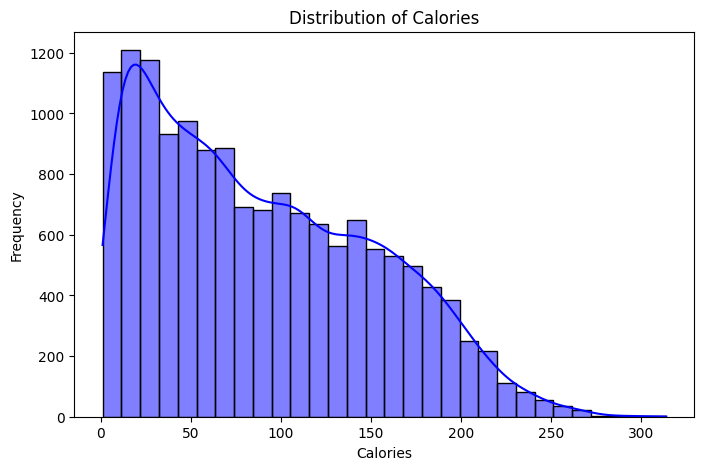

In [10]:
# Additional EDA with Charts
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df["Calories"], kde=True, color='blue', bins=30)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

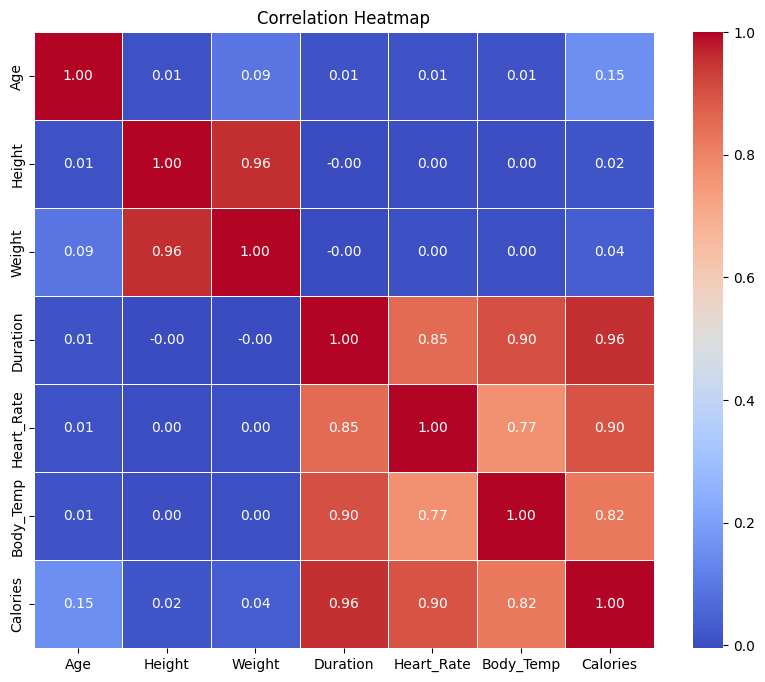

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

> - `Duration` and `Heart Rate` show strong positive correlations with `Calories`, suggesting they are key factors in predicting calorie burn.
> - `Body Temperature` has a moderate correlation with `Calories`, which might reflect physiological responses during exercise.
> - `Age`, `Height` and `Weight` shows little correlation with `Calories`, suggesting no direct relationship.
> - `Height` and `Weight` have a strong positive correlation, likely because taller individuals tend to weigh more.

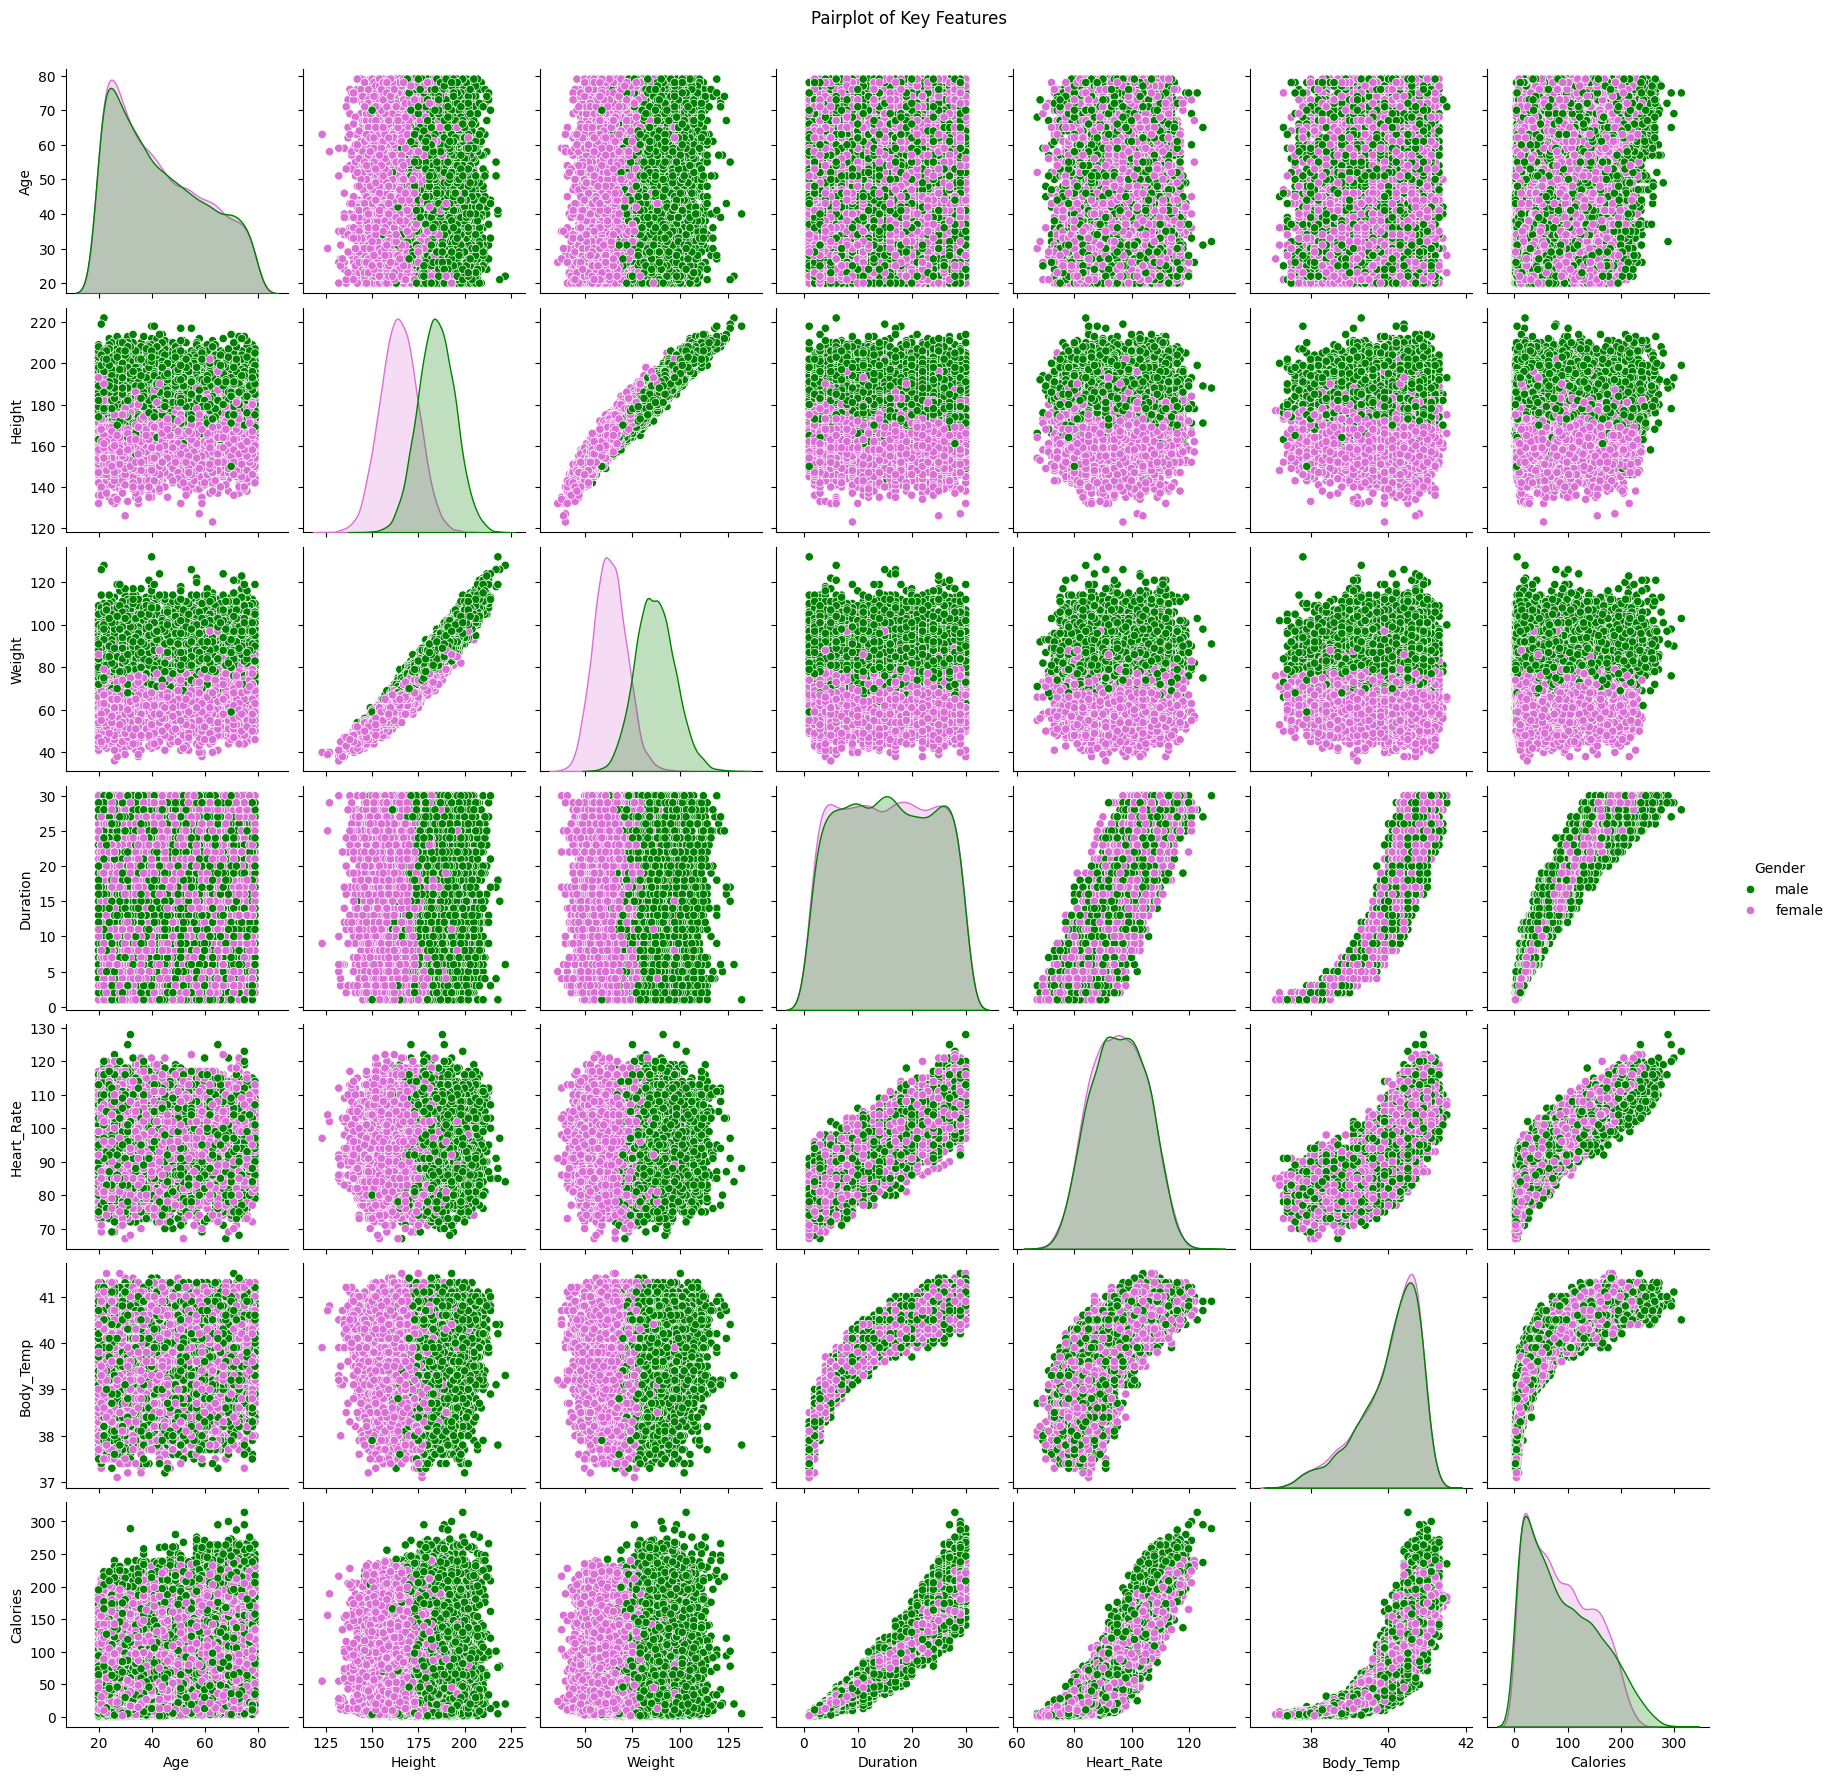

In [12]:
# Pairplot for Relationships Between Features
sns.pairplot(df, vars=numerical_columns, hue="Gender", palette={"male": "green", "female": "orchid"})
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

The pairplot reveals key insights into relationships between features:
- A strong linear relationship is evident between `Duration` and `Calories`, highlighting the direct impact of exercise duration on calorie expenditure.
- Similarly, `Heart Rate` correlates positively with `Calories`, indicating that higher heart rates are associated with increased energy expenditure.
- Notably, the hue-based grouping shows distinct trends for males and females, with males tending to have higher `Weight` and `Calories` values, though there is overlap between the groups.
- A few outliers are visible, particularly in the `Duration` and `Heart Rate` vs. `Calories` plot, potentially due to extreme or irregular workout sessions.

## Data Preprocessing

In [13]:
# Drop unnecessary columns
data = df.drop(columns=["User_ID"])

# Encode categorical variables
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

data.sample(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
2878,1,26,179.0,81.0,27.0,107.0,40.6,161.0
2882,0,56,153.0,53.0,6.0,80.0,39.2,24.0
7289,0,53,167.0,72.0,20.0,96.0,40.4,107.0
2239,0,40,172.0,71.0,20.0,101.0,40.7,113.0
11276,1,55,198.0,99.0,7.0,83.0,39.7,29.0


In [14]:
# Split features and target
X = data.drop(columns=["Calories"])
y = data["Calories"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [-0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [ 1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [-0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [ 1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [ 1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

In [15]:
# Split the dataset into training, validation, and test sets (70:15:15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (10500, 7)
Validation Data Shape: (2250, 7)
Test Data Shape: (2250, 7)


## Train Initial Models

In [16]:
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    return mae, mse, rmse, r2

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [18]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_val, y_val)

results_df = pd.DataFrame.from_dict(
    results, orient='index', columns=['MAE', 'MSE', 'RMSE', 'R^2']
)

In [19]:
# Display results
print("Initial Model Performance:")
results_df.sort_values(by=['RMSE'], ascending=True)

Initial Model Performance:


,MAE,MSE,RMSE,R^2
Random Forest,1.775609,7.929782,2.815987,0.997969
Gradient Boosting,2.631895,12.897992,3.591377,0.996697
Ridge,8.402486,129.434746,11.376939,0.966855
Linear Regression,8.403063,129.434830,11.376943,0.966855
Lasso,9.109980,154.471724,12.428665,0.960444


>Random Forest Regressor is the best-performing model with lowest error scores (MAE, MSE, RMSE) and highest R<sup>2</sup> score.

## Hyperparameter Tuning

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:")
best_params = grid_search.best_params_
best_params

Best Hyperparameters for Random Forest:


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
# Evaluate the best model on validation data
best_model = grid_search.best_estimator_
mae, mse, rmse, r2 = evaluate_model(best_model, X_val, y_val)
print(f"Tuned Random Forest Performance:\n MAE={mae:.2f}\n MSE={mse:.2f}\n RMSE={rmse:.2f}\n R^2={r2:.2f}")

Tuned Random Forest Performance:
 MAE=1.76
 MSE=7.89
 RMSE=2.81
 R^2=1.00


> The results indicate that the tuned Random Forest model is highly effective on unseen validation data, maintaining both accuracy and consistency.

## Final Evaluation on Test set

In [22]:
final_model = best_model

# Train on full training+validation data
final_model.fit(np.vstack((X_train, X_val)), np.concatenate((y_train, y_val)))
mae, mse, rmse, r2 = evaluate_model(final_model, X_test, y_test)
print(f"Final Model Performance on Test Set:\n MAE={mae:.2f}\n MSE={mse:.2f}\n RMSE={rmse:.2f}\n R^2={r2:.2f}")

Final Model Performance on Test Set:
 MAE=1.74
 MSE=8.06
 RMSE=2.84
 R^2=1.00


>- Since both validation and test results show an R² of 1.00 with low errors, it suggests the model generalizes well and is not overfitting.
>- The near-identical performance on validation (MAE=1.76, RMSE=2.81) and test sets (MAE=1.74, RMSE=2.84) demonstrates the robustness and stability of the model.
>- With such performance, the identified key features such as `Duration` and `Heart Rate` likely have strong predictive power. The feature importance analysis should be revisited to ensure these align with domain knowledge.

## Feature Importance

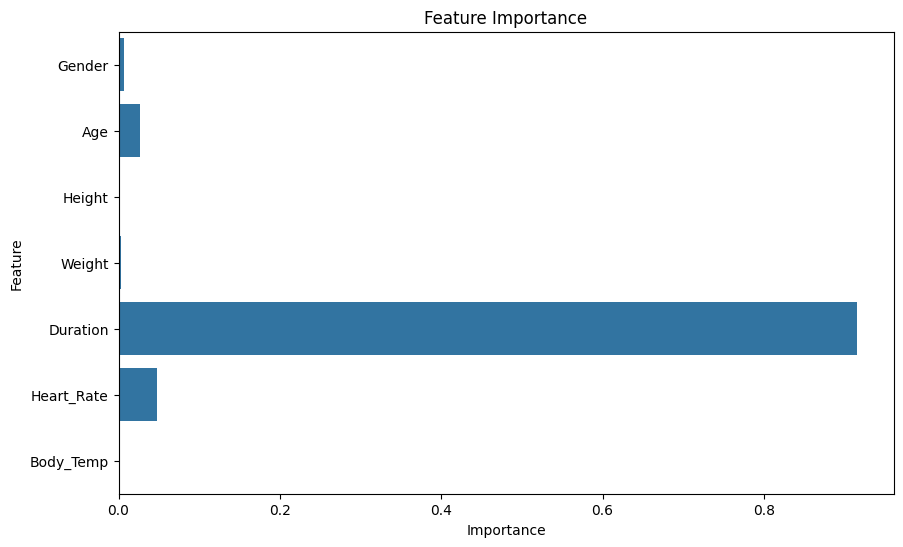

In [23]:
# Feature Importance (for tree-based models)
feature_importances = final_model.feature_importances_
feature_names = data.drop(columns="Calories").columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

> The feature importance plot highlights that `Duration` is the most significant predictor of calorie burn, with an importance score that overwhelmingly surpasses all other features. The other variables — `Heart Rate`, `Weight`, `Body Temperature`, `Height`, `Age`, and `Gender` — contribute very minimally to the model's predictive power.
> #### Analysis:
> Dominance of Duration:
> - The result makes sense from a physiological perspective, as the time spent in physical activity (Duration) has a direct and substantial impact on calorie burn.
> - Its dominance in the feature importance analysis indicates that the relationship between Duration and Calories is strong and consistent, making it the primary driver of predictions.
>
> Minimal Contribution of Other Features:
> - Features like Heart Rate and Age might have a smaller impact because their effect on calorie burn could be indirect or less pronounced compared to Duration.
> - Gender, Height, Weight and Body Temperature appear to contribute negligibly, possibly because their impact is either too small to be significant in this dataset or because they are correlated with other features like Age or Heart Rate.
>
> Future models could prioritize the top features while considering the exclusion of less impactful ones like `Height` and `Weight` to simplify the analysis.